<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Universidad EAN" width = "50%"  height="160
0">  </img>

En esta gu√≠a de trabajo usted deber√° poner en pr√°ctica los conceptos fundamentales y las herramientas para realizar **an√°lisis de correlaci√≥n** y **an√°lisis de regresi√≥n** con *Python*.  

Para iniciar, se requiere cargar las librar√≠as necesarias, en caso de necesitar otras puede agregarlas a la celda.

In [2]:
# Cargar librer√≠as
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# librer√≠as relacionadas con modelos de regresi√≥n
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **‚öõÔ∏è An√°lisis de correlaci√≥n y modelos de regresi√≥n**  
---  

La actividad a desarrollar estar√° centrada en explorar de manera pr√°ctica dos conceptos importantes:

**An√°lisis de correlaci√≥n**: Se puede definir como un proceso estad√≠stico en el que se busca identificar asociaciones (relaciones o dependencias) entre dos variables. Estas relaciones se pueden medir a partir de un coeficiente de correlaci√≥n.

**An√°lisis de regresi√≥n** es el proceso estad√≠stico en el que se busca modelar o definir relaciones y asociaciones espec√≠ficas entre variables.




## **‚öõÔ∏è Datos**
---

La base de datos a utilizar se denimona **`Framingham`**. Este conjunto de datos est√° disponible p√∫blicamente en el sitio web de [Kaggle](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression), y es de un estudio de riesgo cardiovascular sobre los residentes de la ciudad de Framingham, Massachusetts en Estados Unidos. El objetivo de la clasificaci√≥n es predecir si el paciente tiene un riesgo de 10 a√±os de padecer una futura enfermedad coronaria (CHD). El conjunto de datos proporciona la informaci√≥n de los pacientes con m√°s de 3.000 registros y 15 atributos. Se incluyen diferentes variables con factores de riesgo potenciales a nivel demogr√°ficos, comportamentales y m√©dicos.

**Demogr√°ficos:**
* **`male`**: Masculino o femenino (Nominal).
* **`age`**: Edad del paciente (las edades registradas han sido truncadas a n√∫meros enteros, sin embargo, recordar que la edad en una variable num√©rica continua).

**Comportamiento:**
* **`currentSmoker`**: Si el paciente es o no fumador actualmente.
* **`cigsPerDay`**: El n√∫mero de cigarrillos que la persona fuma en promedio en un d√≠a (puede considerarse continuo, ya que se puede tener cualquier n√∫mero de cigarrillos, incluso medio cigarrillo).

**Historia m√©dica:**
* **`BPMeds`**: Si el paciente estaba o no tomando medicamentos para la presi√≥n sangu√≠nea (nominal).
* **`prevalentStroke`**: Si el paciente ha tenido previamente una apoplej√≠a o no (nominal).
* **`prevalentHyp`**: Si el paciente era o no hipertenso (nominal).
* **`diabetes`**: Si el paciente ten√≠a o no diabetes (nominal).
* **`totChol`**: Nivel de colesterol total (continuo).
* **`sysBP`**: Presi√≥n sangu√≠nea sist√≥lica (continua).
* **`diaBP`**: Presi√≥n arterial diast√≥lica (continua).
* **`BMI`**: √çndice de Masa Corporal - IMC (continuo).
* **`heartRate`**: Ritmo card√≠aco (continuo).
* **`glucose`**: Nivel de glucosa (continuo).

**Variable objetivo deseada:**
* **`TenYearCHD`**: Riesgo de enfermedad coronaria CHD a 10 a√±os (binario: "1", significa "S√≠", "0" significa "No").

In [3]:
url = "https://docs.google.com/uc?export=download&id=1z2k_-8DtwRGFZhRlSmJBwLn6d0JdLt_k"
df = pd.read_csv(url)

**Nombres de los integrantes del grupo**

*   Jiliar Antonio Silgado Cardona

## **‚úÖ Exploraci√≥n de los datos**

### **‚≠ïÔ∏è Introducci√≥n a la Fase de Exploraci√≥n de Datos**

En esta fase inicial del an√°lisis de datos, se realiza una exploraci√≥n preliminar del conjunto de datos para comprender su estructura y caracter√≠sticas b√°sicas. Esta etapa es crucial para identificar los aspectos fundamentales del dataset y preparar el terreno para un an√°lisis m√°s profundo.

Durante la exploraci√≥n, se utilizan diversas instrucciones para obtener una visi√≥n general del conjunto de datos:

- **`df.info()`**: Proporciona un resumen conciso de la informaci√≥n del DataFrame, incluyendo el n√∫mero de entradas no nulas y los tipos de datos de cada columna.
- **`print(df.shape)`**: Muestra las dimensiones del DataFrame, es decir, el n√∫mero de filas y columnas.
- **`print(df.head())`**: Muestra las primeras filas del DataFrame, facilitando una vista r√°pida de los datos.
- **`print(df.tail())`**: Muestra las √∫ltimas filas del DataFrame, √∫til para verificar el final del dataset.
- **`print(total_size)`**: Indica el tama√±o total del DataFrame en t√©rminos de n√∫mero de filas.
- **`print(df.shape)`**: Indica la dimensi√≥n del Dataframe (filas, columnas).
- **`print(df.memory_usage(deep=True))`**: Proporciona el uso de memoria por columna, permitiendo identificar el consumo de recursos.
- **`print(df.columns)`**: Lista los nombres de todas las columnas en el DataFrame.

Estas instrucciones ofrecen una visi√≥n general del conjunto de datos, ayudando a detectar posibles problemas como datos faltantes, tipos de datos incorrectos o inconsistencias. Esta exploraci√≥n es un primer paso esencial para un an√°lisis de datos eficaz.

In [4]:
# Informaci√≥n de Dataframe
print("Informaci√≥n general del DataFrame:\n")
df.info()

Informaci√≥n general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)

### **‚≠ïÔ∏è Diccionario de datos**

Este diccionario de datos proporciona una descripci√≥n detallada de las columnas contenidas en el archivo `Framingham.csv`, que contiene informaci√≥n demogr√°fica, de comportamiento y de historial m√©dico relacionada con la salud cardiovascular de los pacientes. Cada columna est√° detallada con su tipo de dato (`Dtype`), una breve descripci√≥n del tipo de dato (`Descripci√≥n Dtype`), el tama√±o en bytes ocupado por el tipo de dato (`Tama√±o en Bytes`), y una descripci√≥n de los datos representados en esa columna.

El prop√≥sito de este diccionario es facilitar la comprensi√≥n de la estructura del conjunto de datos y ayudar en el an√°lisis y la manipulaci√≥n de la informaci√≥n.

**Descripci√≥n de las Columnas en** `Framingham.csv`

| Column           | Dtype    | Descripci√≥n Dtype                      | Tama√±o en Bytes | Descripci√≥n                                                                                                                |
|------------------|----------|----------------------------------------|-----------------|----------------------------------------------------------------------------------------------------------------------------|
| `male`           | int64    | Entero de 64 bits                      | 8 bytes         | Indica el sexo del paciente: 1 para masculino y 0 para femenino.                                                           |
| `age`            | int64    | Entero de 64 bits                      | 8 bytes         | Edad del paciente en a√±os.                                                                                                 |
| `currentSmoker`  | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente es fumador actualmente: 1 para s√≠, 0 para no.                                                        |
| `cigsPerDay`     | float64  | Flotante de 64 bits                    | 8 bytes         | N√∫mero promedio de cigarrillos fumados por d√≠a.                                                                            |
| `BPMeds`         | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente toma medicamentos para la presi√≥n arterial: 1 para s√≠, 0 para no.                                    |
| `prevalentStroke`| int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente ha sufrido un derrame cerebral previamente: 1 para s√≠, 0 para no.                                    |
| `prevalentHyp`   | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente ha sido diagnosticado con hipertensi√≥n: 1 para s√≠, 0 para no.                                        |
| `diabetes`       | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente tiene diabetes: 1 para s√≠, 0 para no.                                                                |
| `totChol`        | float64  | Flotante de 64 bits                    | 8 bytes         | Nivel de colesterol total en la sangre (mg/dL).                                                                            |
| `sysBP`          | float64  | Flotante de 64 bits                    | 8 bytes         | Presi√≥n arterial sist√≥lica en mmHg.                                                                                        |
| `diaBP`          | float64  | Flotante de 64 bits                    | 8 bytes         | Presi√≥n arterial diast√≥lica en mmHg.                                                                                       |
| `BMI`            | float64  | Flotante de 64 bits                    | 8 bytes         | √çndice de Masa Corporal - IMC del paciente.                                                                                |
| `heartRate`      | float64  | Flotante de 64 bits                    | 8 bytes         | Ritmo card√≠aco del paciente (latidos por minuto).                                                                          |
| `glucose`        | float64  | Flotante de 64 bits                    | 8 bytes         | Nivel de glucosa en sangre (mg/dL).                                                                                        |
| `TenYearCHD`     | int64    | Entero de 64 bits                      | 8 bytes         | Indica el riesgo de enfermedad coronaria en 10 a√±os: 1 para riesgo presente, 0 para sin riesgo.                            |

Este diccionario de datos facilita la interpretaci√≥n de las caracter√≠sticas del dataset y proporciona una visi√≥n clara de la naturaleza de los datos que se deben considerar en el an√°lisis del riesgo de enfermedad coronaria.


#### **‚≠ïÔ∏è Primeras filas del DataFrame**

In [5]:
# Primeros registros
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

#### **‚≠ïÔ∏è √öltimas filas del DataFrame**

In [6]:
# ultimos registros
print(df.tail())

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0  

#### **‚≠ïÔ∏è Tama√±o total del DataFrame en t√©rminos de n√∫mero de filas**

In [7]:
# total de registros
total_size = len(df)
print(f'Tama√±o (N√∫mero de Filas): {total_size}')

Tama√±o (N√∫mero de Filas): 4238


#### **‚≠ïÔ∏è Dimensi√≥n del Dataframe (Filas x Columnas)**

In [8]:
# dimensi√≥n del conjunto de datos (filas, columnas)
print("\nDimensi√≥n del conjunto de datos (filas, columnas):")
print(df.shape)


Dimensi√≥n del conjunto de datos (filas, columnas):
(4238, 16)


#### **‚≠ïÔ∏è Uso de memoria por columna**

In [9]:
# mostrar el tama√±o de la memoria utilizada por el DataFrame
print("Memoria utilizada por el DataFrame (bytes):\n")
print(df.memory_usage(deep=True))

Memoria utilizada por el DataFrame (bytes):

Index                132
male               33904
age                33904
education          33904
currentSmoker      33904
cigsPerDay         33904
BPMeds             33904
prevalentStroke    33904
prevalentHyp       33904
diabetes           33904
totChol            33904
sysBP              33904
diaBP              33904
BMI                33904
heartRate          33904
glucose            33904
TenYearCHD         33904
dtype: int64


#### **‚≠ïÔ∏è Columnas (Variables) en Dataframe**

In [10]:
# nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


#### **‚≠ïÔ∏è N√∫mero Total de Variables**

In [11]:
# N√∫mero total de variables que contiene la base de datos.
num_columnas = df.shape[1]
print(f'N√∫mero de variables (columnas): {num_columnas}')

N√∫mero de variables (columnas): 16


#### **‚≠ïÔ∏è Variables con datos faltantes, Porcentaje total de valores faltantes en la base de datos.**

In [12]:
import json

# Escribir las variables que tienen datos faltantes, adem√°s, proporcionar el porcentaje total de valores faltantes en la base de datos.
# Paso 1: Encontrar columnas con valores faltantes
faltantes_por_columna = df.isnull().sum()

# Paso 2: Filtrar columnas que tienen valores faltantes
data1 = faltantes_por_columna[faltantes_por_columna > 0]
variables_con_faltantes = data1.to_dict()

print('\nCant. valores faltantes por columna:',
      json.dumps(variables_con_faltantes, indent=4),
      sep="\n")

# Paso 3: Calcular el porcentaje de valores faltantes por columna
data = (data1 / len(df)) * 100
data = data.to_dict()
porcentaje_faltantes_por_columna = {key: f'{value:.2f}%' for key, value in data.items()}

# Paso 4: Calcular el porcentaje total de valores faltantes en el DataFrame
porcentaje_total_faltantes = (df.isnull().sum().sum() / df.size) * 100
porcentaje_total_no_faltantes = (df.notnull().sum().sum() / df.size) * 100

# Resultados
print('\n% valores faltantes por columna:', f'{json.dumps(porcentaje_faltantes_por_columna, indent=4)}', sep="\n")

print(f"\nPorcentaje total de valores faltantes en la base de datos: {porcentaje_total_faltantes:.2f}%")
print(f"Porcentaje total de valores en la base de datos: {porcentaje_total_no_faltantes:.2f}%")


Cant. valores faltantes por columna:
{
    "education": 105,
    "cigsPerDay": 29,
    "BPMeds": 53,
    "totChol": 50,
    "BMI": 19,
    "heartRate": 1,
    "glucose": 388
}

% valores faltantes por columna:
{
    "education": "2.48%",
    "cigsPerDay": "0.68%",
    "BPMeds": "1.25%",
    "totChol": "1.18%",
    "BMI": "0.45%",
    "heartRate": "0.02%",
    "glucose": "9.16%"
}

Porcentaje total de valores faltantes en la base de datos: 0.95%
Porcentaje total de valores en la base de datos: 99.05%


#### **‚≠ïÔ∏è Limpieza de datos**

In [13]:
df.dropna(axis=0, inplace=True) # Se eliminan registros con valores faltantes
# Nueva dimensi√≥n del conjunto de datos (filas, columnas)
print("\nNueva Dimensi√≥n del conjunto de datos (filas, columnas):")
print(df.shape)


Nueva Dimensi√≥n del conjunto de datos (filas, columnas):
(3656, 16)


##**‚öõÔ∏è 1.0 Exploraci√≥n de la correlaci√≥n**  
---
Suponga que usted quiere modelar la relaci√≥n existente entre la presi√≥n sist√≥lica de los pacientes y su edad.

La primera tarea a relizar consiste en explorar la relaci√≥n entre las variables de forma gr√°fica. Construya una gr√°fica de dispersi√≥n donde se pueda revisar la asociaci√≥n entre las variables, recuerde realizar un an√°lisis de la informac√≥n que muestra la gr√°fica.

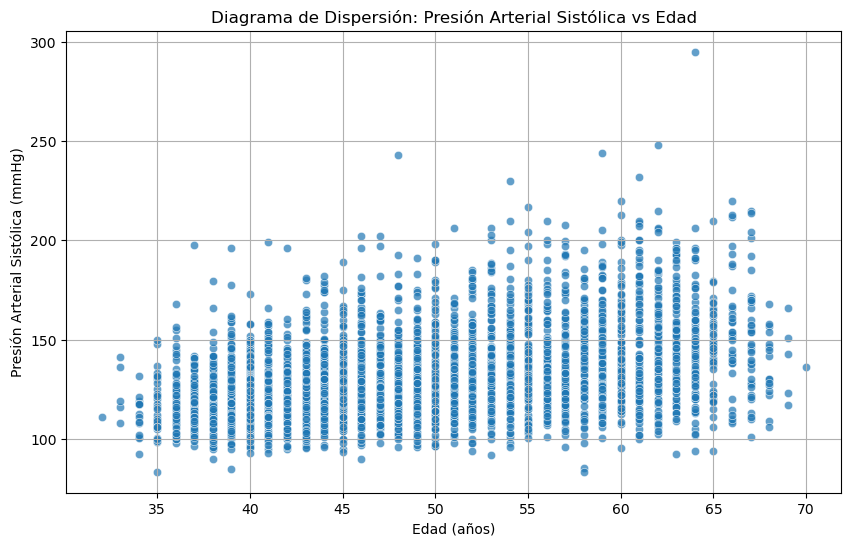

In [14]:
# Escriba aqu√≠ el c√≥digo correspondiente
# Crear el gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='sysBP', alpha=0.7)
plt.title('Diagrama de Dispersi√≥n: Presi√≥n Arterial Sist√≥lica vs Edad')
plt.xlabel('Edad (a√±os)')
plt.ylabel('Presi√≥n Arterial Sist√≥lica (mmHg)')
plt.grid(True)
plt.show()

## ‚≠ïÔ∏è **Analisis del Grafico**

*   **Distribuci√≥n de los puntos:** Se logra apreciar que los puntos se concentran mayormente entre las edades 32 a 70 a√±os, pero especificamente aumenta su concentraci√≥n a medida que pasan los a√±os.
*   **Tendencia:** Los puntos parecen seguir una tendencia ascendente, lo que indica que a medida que los pacientes envejecen, su presi√≥n arterial sist√≥lica tiende a ser m√°s alta.
*   **Dispersi√≥n:** los puntos se encuentran muy conentrados pero hay uno que otro punto con comportamiento atipico, puesto que estan dispersos de la concentraci√≥n de puntos, esto puede que resulte ser producto de alguna enfermedad en ciertas personas.

## ‚≠ïÔ∏è **Conclusi√≥n**

En conclusi√≥n, el an√°lisis de la relaci√≥n entre la edad y la presi√≥n arterial sist√≥lica revela una clara tendencia ascendente en los datos, donde los puntos se concentran principalmente entre las edades de 32 a 70 a√±os, aumentando su densidad con el paso del tiempo. Esta tendencia indica que a medida que los pacientes envejecen, su presi√≥n arterial sist√≥lica tiende a ser m√°s alta. Sin embargo, aunque la mayor√≠a de los puntos est√°n bien concentrados, se observan algunos valores at√≠picos que podr√≠an ser indicativos de condiciones m√©dicas espec√≠ficas en ciertos individuos.


## **‚öõÔ∏è 2.0 Exploraci√≥n de la correlaci√≥n**  
---
Para revisar la asociaci√≥n lineal entre las variables presi√≥n sist√≥lica de los pacientes y edad, se requiere calcular el coeficente de correlaci√≥n lineal de Pearson.  
Hallar el coeficiente de correlaci√≥n para estas dos variables y analizar el resultado.

In [16]:
# An√°lisis descriptivo de la relaci√≥n
age = df['age']
sysBP = df['sysBP']

# Calcular el coeficiente de correlaci√≥n de Pearson
correlation_coefficient, p_value = stats.pearsonr(age, sysBP)

# Mostrar el coeficiente de correlaci√≥n y el valor p
print(f'Coeficiente de correlaci√≥n de Pearson: {correlation_coefficient:.2f}')
print(f'Valor p: {p_value:.4f}')

Coeficiente de correlaci√≥n de Pearson: 0.39
Valor p: 0.0000


## ‚≠ïÔ∏è **Correlaci√≥n:**

Un coeficiente de 0.39 indica una correlaci√≥n positiva moderada entre las dos variables. Esto sugiere que, en general, a medida que la edad de los pacientes aumenta, tambi√©n tiende a aumentar la presi√≥n arterial sist√≥lica, aunque la relaci√≥n no es muy fuerte. Esto podr√≠a implicar que, aunque la edad es un factor asociado con la presi√≥n arterial sist√≥lica, no es el √∫nico determinante. Otros factores, como el estilo de vida, la gen√©tica y las condiciones de salud subyacentes, tambi√©n pueden influir en la presi√≥n arterial.

##**‚öõÔ∏è 3.0 Estimar los par√°metros del modelo**  
---
Se requiere estimar la **pendiente ($Œ≤$)** y el **intercepto (Œ±)** de la regresi√≥n para poder construir la ecuaci√≥n general de la recta que mejor describe la relaci√≥n entre las dos variables:
Para este caso el modelo tendr√° la forma:

$$sysBP = Œ≤ * age + Œ±$$
Realice la estimaci√≥n de los par√°metros del modelo de regresi√≥n lineal simple y relice un an√°lisis de cada par√°metro estimado.


## ‚≠ïÔ∏è **Soluci√≥n:**

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     649.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.69e-132
Time:                        11:20:35   Log-Likelihood:                -16204.
No. Observations:                3656   AIC:                         3.241e+04
Df Residuals:                    3654   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6780      1.978     41.793      0.0

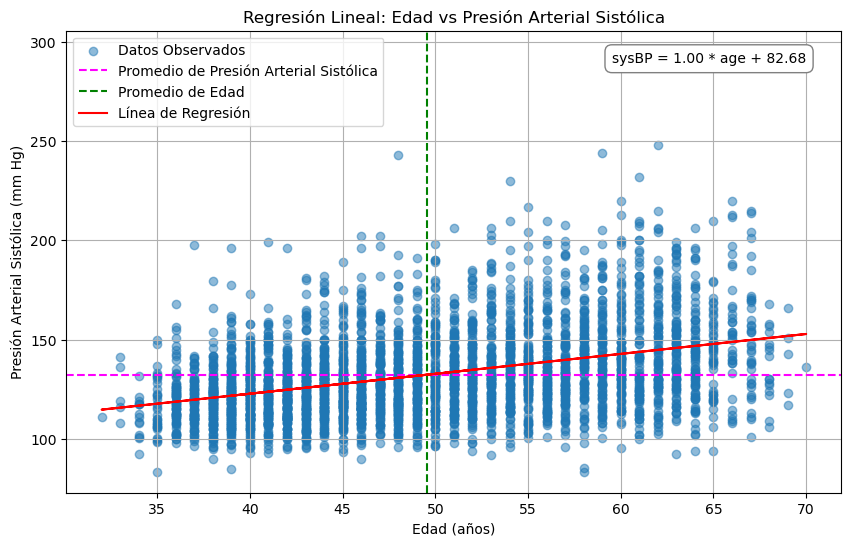

Edad: 30 a√±os, Presi√≥n arterial sist√≥lica: 112.76 mm Hg
Edad: 35 a√±os, Presi√≥n arterial sist√≥lica: 117.77 mm Hg
Edad: 40 a√±os, Presi√≥n arterial sist√≥lica: 122.79 mm Hg
Edad: 45 a√±os, Presi√≥n arterial sist√≥lica: 127.80 mm Hg
Edad: 50 a√±os, Presi√≥n arterial sist√≥lica: 132.81 mm Hg
Edad: 55 a√±os, Presi√≥n arterial sist√≥lica: 137.83 mm Hg
Edad: 60 a√±os, Presi√≥n arterial sist√≥lica: 142.84 mm Hg
Edad: 65 a√±os, Presi√≥n arterial sist√≥lica: 147.85 mm Hg
Edad: 70 a√±os, Presi√≥n arterial sist√≥lica: 152.87 mm Hg


In [17]:
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Seleccionar las columnas relevantes
X = df['age']  # Variable independiente
y = df['sysBP']  # Variable dependiente

# Agregar una constante a la variable independiente para el t√©rmino de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresi√≥n lineal
model = sm.OLS(y, X).fit()

# Resumen de los resultados del modelo
print(model.summary())

# Extraer los par√°metros estimados utilizando .iloc
intercept = model.params.iloc[0]  # Œ±
slope = model.params.iloc[1]  # Œ≤

# Mostrar los par√°metros estimados
print(f'Intercepto (Œ±): {intercept:.2f}')
print(f'Pendiente (Œ≤): {slope:.2f}')

# Visualizar la relaci√≥n con la l√≠nea de regresi√≥n
# Gr√°fico con l√≠nea de regresi√≥n, medias y etiquetas de la funci√≥n
plt.figure(figsize=(10, 6))

# Gr√°fico de dispersi√≥n
plt.scatter(df['age'], df['sysBP'], alpha=0.5, label='Datos Observados')

# T√≠tulo y ejes
plt.title('Regresi√≥n Lineal: Edad vs Presi√≥n Arterial Sist√≥lica')
plt.xlabel('Edad (a√±os)')
plt.ylabel('Presi√≥n Arterial Sist√≥lica (mm Hg)')

# L√≠neas de promedio
plt.axhline(y=df['sysBP'].mean(), color='magenta', linestyle='--', label='Promedio de Presi√≥n Arterial Sist√≥lica')
plt.axvline(x=df['age'].mean(), color='g', linestyle='--', label='Promedio de Edad')

# L√≠nea de regresi√≥n
plt.plot(df['age'], intercept + slope * df['age'], color='red', label='L√≠nea de Regresi√≥n')

# Mostrar la ecuaci√≥n en la parte superior derecha del gr√°fico
equation_text = f'sysBP = {slope:.2f} * age + {intercept:.2f}'
plt.text(df['age'].max(), df['sysBP'].max(), equation_text, fontsize=10, color='black',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Leyenda y cuadr√≠cula
plt.legend(loc='upper left')

# Leyenda y cuadr√≠cula
plt.legend()
plt.grid()

# Mostrar gr√°fico
plt.show()

# Definici√≥n de la funci√≥n de regresi√≥n
def sysBP(age):
    return slope * age + intercept

# Ejemplo de uso de la funci√≥n sysBP
# Calcular la presi√≥n arterial sist√≥lica para diferentes edades
edades = []
for i in range(30, 71, 5):  # El 71 no se incluye
    edades.append(i)
presiones_sistolicas = [sysBP(age) for age in edades]

# Imprimir los resultados
for age, bp in zip(edades, presiones_sistolicas):
    print(f"Edad: {age} a√±os, Presi√≥n arterial sist√≥lica: {bp:.2f} mm Hg")

## ‚≠ïÔ∏è **Analisis de Parametros:**

| Par√°metro                | Valor               | Interpretaci√≥n                                                                                  |
|--------------------------|---------------------|-------------------------------------------------------------------------------------------------|
| **Variable dependiente**  | `sysBP`             | La presi√≥n arterial sist√≥lica (sysBP) es la variable objetivo en el modelo.                     |
| **R-cuadrado (R¬≤)**       | 0.151               | Indica que el modelo explica el 15.1% de la variabilidad en `sysBP`. No es un ajuste muy alto.   |
| **R-cuadrado ajustado**   | 0.151               | Similar a R¬≤, confirma que el modelo tiene un ajuste d√©bil.                                     |
| **Estad√≠stico F**         | 649.7               | El modelo es estad√≠sticamente significativo; hay una relaci√≥n entre las variables.              |
| **Prob (F-statistic)**    | 4.69e-132           | La probabilidad asociada al estad√≠stico F es extremadamente baja, lo que refuerza la relevancia del modelo. |
| **Intercepto (Œ±)**        | 82.68               | Representa la presi√≥n arterial sist√≥lica esperada cuando la edad es 0.                          |
| **Coeficiente (Œ≤)**       | 1.00                | Por cada a√±o adicional de edad, la presi√≥n sist√≥lica se incrementa en 1.00 mmHg.                |
| **Error est√°ndar (Œ≤)**    | 0.039               | Mide la variabilidad del coeficiente de la edad; es bajo, lo que sugiere una estimaci√≥n precisa. |
| **t-Valor (Œ≤)**           | 25.49               | Indica que la edad es un predictor muy significativo de la presi√≥n sist√≥lica (valor p < 0.001).  |
| **P> /t/ (Œ≤)**             | 0.000               | La edad tiene un efecto significativo en la presi√≥n arterial sist√≥lica.                         |
| **Intervalo de confianza (95%)** | [0.926, 1.080] | El coeficiente de edad est√° dentro de este rango con un 95% de confianza.                      |
| **Durbin-Watson**         | 1.993               | Cerca de 2, sugiere que no hay autocorrelaci√≥n significativa en los residuos.                   |
| **Skew (Asimetr√≠a)**      | 0.962               | Muestra una ligera asimetr√≠a positiva en la distribuci√≥n de los residuos.                       |
| **Kurtosis**              | 5.193               | La distribuci√≥n de los residuos tiene colas m√°s pesadas de lo normal (leptoc√∫rtica).            |

### **Conclusiones**
- **Ajuste del modelo**: El modelo tiene un R¬≤ bajo (0.151), lo que sugiere que la edad explica solo una peque√±a parte de la variabilidad en la presi√≥n arterial sist√≥lica.
- **Significancia**: A pesar del bajo R¬≤, la variable `age` es un predictor significativo de la presi√≥n arterial sist√≥lica, con un coeficiente de 1.00, lo que significa que la presi√≥n aumenta aproximadamente 1 mmHg por cada a√±o de edad.
- **Precisi√≥n**: Los intervalos de confianza y el bajo error est√°ndar sugieren que la estimaci√≥n del efecto de la edad es precisa.


## **‚öõÔ∏è 4.0 Correlaci√≥n lineal m√∫ltiple - Relaci√≥n entre variables**  
---

Para construir un modelo de regresi√≥n lineal m√∫ltiple, se consideran dos o m√°s variables regresoras, estas pueden ser de tipo num√©rico o cualitativo. Para este caso,  considere todas las variables num√©ricas de la base principal y seleccione como variable respuesta la presi√≥n sist√≥lica de los pacientes.

El primer paso para definir un modelo lineal m√∫ltiple consiste en estudiar la relaci√≥n que existe entre las variables. Con esta informaci√≥n se puede identificar los mejores predictores para el modelo e identificar otras caracter√≠sticas que podr√≠an afectar el desempe√±o del modelo.
- Construya una matriz que permita observar la correlaci√≥n de todas las variables num√©ricas.
- Presente una gr√°fica adecuada que represente la correlaci√≥n entre las variables.
- ¬øQu√© variables y en qu√© medida se relacionan mejor con la variable de inter√©s?


## ‚≠ïÔ∏è **Soluci√≥n:**

In [18]:
import pandas as pd

# Supongamos que ya tienes cargado el DataFrame con los datos
# df es el DataFrame que contiene la base de datos

# Seleccionar solo las columnas num√©ricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlaci√≥n para todas las variables num√©ricas
correlation_matrix = df[numerical_columns].corr()

# Filtrar la matriz de correlaci√≥n para mostrar las correlaciones con 'sysBP'
correlation_with_sysBP = correlation_matrix[['sysBP']].sort_values(by='sysBP', ascending=False)

# Mostrar la matriz de correlaci√≥n centrada en 'sysBP'
print(correlation_with_sysBP)


                    sysBP
sysBP            1.000000
diaBP            0.786727
prevalentHyp     0.697790
age              0.388551
BMI              0.331004
BPMeds           0.271291
TenYearCHD       0.222885
totChol          0.220130
heartRate        0.184901
glucose          0.134702
diabetes         0.102574
prevalentStroke  0.061080
male            -0.045484
cigsPerDay      -0.094764
education       -0.124511
currentSmoker   -0.134371


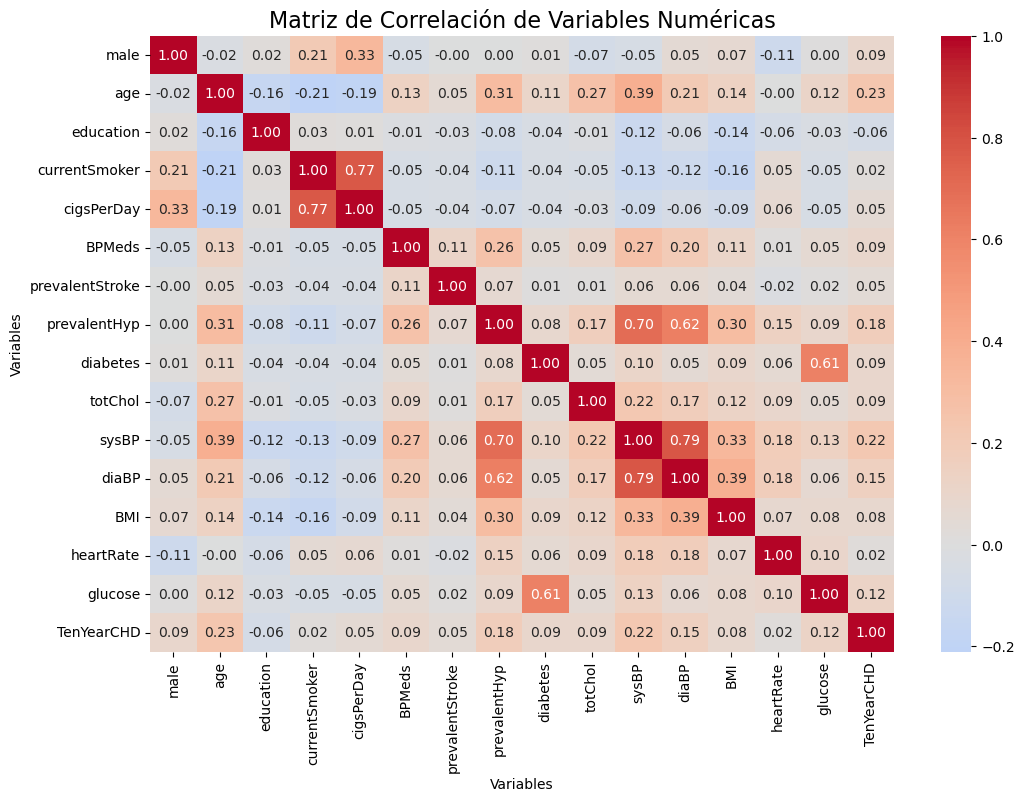

In [19]:
# Gr√°fica de correlaciones

# Seleccionar solo las columnas num√©ricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlaci√≥n
correlation_matrix = df[numerical_cols].corr()

# Establecer la figura del heatmap
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# T√≠tulos y etiquetas
plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el heatmap
plt.show()


## ‚≠ïÔ∏è **Conclusi√≥n sobre las Variables Relacionadas con SysBP**

En el an√°lisis de correlaci√≥n realizado, se observan las siguientes relaciones entre la presi√≥n arterial sist√≥lica (sysBP) y otras variables:

* **Presi√≥n Arterial Diast√≥lica (diaBP):** Con un coeficiente de correlaci√≥n de 0.79, se establece una relaci√≥n fuerte y positiva con sysBP. Esto sugiere que a medida que la presi√≥n diast√≥lica aumenta, tambi√©n tiende a aumentar la presi√≥n sist√≥lica, lo cual es consistente con la fisiolog√≠a cardiovascular, donde ambas medidas son interdependientes.

* **Hipertensi√≥n Prevalente (prevalentHyp):** La correlaci√≥n de 0.70 indica una relaci√≥n fuerte entre la presencia de hipertensi√≥n y la presi√≥n sist√≥lica. Los pacientes diagnosticados como hipertensos tienden a tener una presi√≥n sist√≥lica significativamente m√°s alta, lo que resalta la importancia de controlar la hipertensi√≥n para el manejo de la salud cardiovascular.

* **Edad (age):** La correlaci√≥n de 0.39 muestra una relaci√≥n moderada entre la edad y sysBP. Esto implica que a medida que los pacientes envejecen, es probable que su presi√≥n arterial sist√≥lica aumente, aunque no es la √∫nica variable determinante en este contexto.

* **√çndice de Masa Corporal (BMI):** Con una correlaci√≥n de 0.33, la relaci√≥n entre BMI y sysBP es m√°s d√©bil, pero a√∫n sugiere que un mayor √≠ndice de masa corporal puede estar asociado con un incremento en la presi√≥n arterial sist√≥lica. Esto indica que el control del peso corporal puede ser relevante en el manejo de la hipertensi√≥n.

### **Resumen**

En conclusi√≥n, las variables que mejor se relacionan con la presi√≥n arterial sist√≥lica son la presi√≥n arterial diast√≥lica y la hipertensi√≥n prevalente, con correlaciones altas que sugieren una interdependencia significativa. La edad y el √≠ndice de masa corporal tambi√©n est√°n correlacionados con sysBP, pero en menor medida. Esto indica que, aunque el envejecimiento y el estado de peso son factores a considerar, las condiciones de presi√≥n arterial diast√≥lica y hipertensi√≥n son determinantes m√°s fuertes para la presi√≥n arterial sist√≥lica. Para mejorar la salud cardiovascular, es crucial prestar atenci√≥n a estas variables y su interacci√≥n.

## **‚öõÔ∏è 5.0 Ajuste del modelo**  
---

- Ajustar un primer modelo utilizando todas las variables que se definieron como predictoras.
- Calcular y analizar el coeficiente de determinaci√≥n del modelo
- ¬ø El modelo es significativo?

### ‚≠ïÔ∏è **Analisis y selecci√≥n de variables predictoras**

An√°lisis de Correlaciones y Selecci√≥n de Variables Predictoras para `sysBP`

| Variable         | Tipo de Dato | Correlaci√≥n con `sysBP` | Interpretaci√≥n                              | Selecci√≥n como Predictora |
|------------------|--------------|-------------------------|---------------------------------------------|---------------------------|
| `diaBP`          | float64      | 0.786727                | Fuerte correlaci√≥n positiva con `sysBP`. La presi√≥n arterial diast√≥lica es un predictor clave. | S√≠ |
| `prevalentHyp`   | int64        | 0.697790                | Fuerte correlaci√≥n positiva con `sysBP`. La hipertensi√≥n previa es un predictor importante. | S√≠ |
| `age`            | int64        | 0.388551                | Moderada correlaci√≥n positiva con `sysBP`. La edad del paciente influye en la presi√≥n arterial sist√≥lica. | S√≠ |
| `BMI`            | float64      | 0.331004                | Moderada correlaci√≥n positiva con `sysBP`. El √≠ndice de masa corporal tiene impacto en la presi√≥n arterial. | S√≠ |
| `BPMeds`         | float64      | 0.271291                | Moderada correlaci√≥n positiva con `sysBP`. El uso de medicamentos para la presi√≥n arterial afecta `sysBP`. | S√≠ |
| `TenYearCHD`     | int64        | 0.222885                | Baja correlaci√≥n positiva con `sysBP`. El riesgo de enfermedad coronaria tiene una relaci√≥n d√©bil. | Opcional |
| `totChol`        | float64      | 0.220130                | Baja correlaci√≥n positiva con `sysBP`. El colesterol total muestra una relaci√≥n d√©bil con la presi√≥n arterial. | Opcional |
| `heartRate`      | float64      | 0.184901                | Baja correlaci√≥n positiva con `sysBP`. El ritmo card√≠aco tiene una relaci√≥n d√©bil con `sysBP`. | Opcional |
| `glucose`        | float64      | 0.134702                | Baja correlaci√≥n positiva con `sysBP`. El nivel de glucosa en sangre muestra una relaci√≥n d√©bil. | Opcional |
| `diabetes`       | int64        | 0.102574                | Baja correlaci√≥n positiva con `sysBP`. La diabetes tiene una relaci√≥n d√©bil con la presi√≥n arterial sist√≥lica. | Opcional |
| `prevalentStroke`| int64        | 0.061080                | Muy baja correlaci√≥n positiva con `sysBP`. La apoplej√≠a previa tiene poca relaci√≥n con la presi√≥n sist√≥lica. | No |
| `male`           | int64        | -0.045484               | Correlaci√≥n negativa muy d√©bil con `sysBP`. El sexo masculino muestra muy poca relaci√≥n con la presi√≥n arterial. | No |
| `cigsPerDay`     | float64      | -0.094764               | Correlaci√≥n negativa d√©bil con `sysBP`. Fumar cigarrillos muestra una relaci√≥n inversa leve con la presi√≥n sist√≥lica. | No |
| `education`      | float64      | -0.124511               | Correlaci√≥n negativa baja con `sysBP`. El nivel educativo tiene poca influencia sobre la presi√≥n sist√≥lica. | No |
| `currentSmoker`  | int64        | -0.134371               | Correlaci√≥n negativa baja con `sysBP`. Ser fumador actual tiene una relaci√≥n inversa d√©bil con la presi√≥n arterial. | No |

In [20]:
#Inicializaci√≥n de variables predictoras: Marcadas con S√≠ y Opcional
predictors = ['diaBP', 'prevalentHyp', 'age', 'BMI', 'BPMeds',
              'TenYearCHD', 'totChol', 'heartRate', 'glucose', 'diabetes']

### ‚≠ïÔ∏è **Modelo con todas las variables predictoras**

In [21]:
# Ajuste del primer modelo utilizando todas las variables que se definieron como predictoras.
# Seleccionar las variables num√©ricas (aseg√∫rate de que no hay valores nulos)
X = df[predictors] # Variable independientes
y = df['sysBP']  # Variable dependiente

# Agregar una constante para el t√©rmino de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresi√≥n lineal m√∫ltiple
model = sm.OLS(y, X).fit()

# Resumen de los resultados del modelo
print(model.summary())

# Calcular el coeficiente de determinaci√≥n (R¬≤)
r_squared = model.rsquared
print(f'Coeficiente de determinaci√≥n (R¬≤): {r_squared:.4f}')

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     987.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:56   Log-Likelihood:                -14107.
No. Observations:                3656   AIC:                         2.824e+04
Df Residuals:                    3645   BIC:                         2.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3738      2.504      4.542   

### ‚≠ïÔ∏è **Analisis del coeficiente de determinaci√≥n del modelo**
El coeficiente de determinaci√≥n (R¬≤) de 0.7363 sugiere que aproximadamente el 73.63% de la variabilidad en la presi√≥n arterial sist√≥lica (sysBP) puede explicarse por las variables predictoras incluidas en el modelo. Este valor indica una relaci√≥n s√≥lida entre las variables, lo que respalda la efectividad del modelo en la predicci√≥n de la presi√≥n arterial. Adem√°s, el ajuste del modelo se considera bueno, aunque existe un 26.37% de variabilidad que permanece sin explicar, lo que podr√≠a implicar que hay otros factores no considerados que tambi√©n afectan la presi√≥n arterial.

In [22]:
# Determinaci√≥n si el modelo es significativo
# Definir las variables dependiente e independiente
X = df[predictors] # Variable independientes
y = df['sysBP']  # Variable dependiente

# Agregar una constante a las variables independientes para el t√©rmino de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresi√≥n lineal
model = sm.OLS(y, X).fit()

# Obtener el F-statistic y el p-value
f_statistic = model.fvalue
p_value = model.f_pvalue

# Mostrar los resultados
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')


F-statistic: 987.3375
p-value: 0.0000


## ‚≠ïÔ∏è **¬ø El modelo es significativo?**


* **estad√≠stico F:** Este valor es alto, lo que sugiere que al menos una de las variables independientes en el modelo tiene un efecto significativo en la variable dependiente (sysBP).

* **p-value:** El p-value asociado al estad√≠stico F es 0.00, que es mucho menor que el nivel de significancia com√∫nmente utilizado (Œ± = 0.05). Esto indica que podemos rechazar la hip√≥tesis nula de que todos los coeficientes son iguales a cero (es decir, que ninguna de las variables independientes tiene un efecto significativo en sysBP).

**Conclusi√≥n:**
S√≠, el modelo es significativo, ya que el estad√≠stico F es alto y el p-value es muy bajo, lo que indica que las variables independientes en el modelo explican de manera significativa la variabilidad de la presi√≥n arterial sist√≥lica.



##**‚öõÔ∏è 6.0 Modelos adicionales**  
---

- Proponer dos modelos adicionales haciendo selecci√≥n de variabes pregresoras.
- Calcular y analizar el coeficiente de determinaci√≥n para cada modelo
- ¬ø El modelo es significativo?

## ‚≠ïÔ∏è **Modelo 2: Selecci√≥n hacia atr√°s**



In [23]:
# Modelo 2: Selecci√≥n hacia atr√°s
# Incluir todas las variables
X1 = df[predictors] # Variable independientes
y = df['sysBP']

# Ajustar el modelo de regresi√≥n lineal
model1 = sm.OLS(y, sm.add_constant(X1)).fit()
print("Modelo 3: Selecci√≥n hacia atr√°s")
print(model1.summary())
print(f'R¬≤: {model1.rsquared:.4f}\n')

Modelo 3: Selecci√≥n hacia atr√°s
                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     987.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:59   Log-Likelihood:                -14107.
No. Observations:                3656   AIC:                         2.824e+04
Df Residuals:                    3645   BIC:                         2.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

In [24]:
# Modelo 3: Selecci√≥n hacia adelante
# Seleccionar un subconjunto de variables
X2 = df[['diaBP', 'prevalentHyp', 'age', 'BMI', 'BPMeds']] #Solo las variables marcadas con s√≠
model2 = sm.OLS(y, sm.add_constant(X2)).fit()
print("Modelo 3: Selecci√≥n hacia adelante")
print(model2.summary())
print(f'R¬≤: {model2.rsquared:.4f}\n')

Modelo 3: Selecci√≥n hacia adelante
                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:59   Log-Likelihood:                -14147.
No. Observations:                3656   AIC:                         2.831e+04
Df Residuals:                    3650   BIC:                         2.834e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

In [25]:
# Obtener el valor p del F-statistic para el modelo de selecci√≥n hacia atr√°s
f_p_value_model1 = model1.f_pvalue
print(f"Valor p del modelo de selecci√≥n hacia atr√°s: {f_p_value_model1:.4f}")

# Obtener el valor p del F-statistic para el modelo de selecci√≥n hacia adelante
f_p_value_model2 = model2.f_pvalue
print(f"Valor p del modelo de selecci√≥n hacia adelante: {f_p_value_model2:.4f}")

# Evaluar la significancia
significant_model1 = f_p_value_model1 < 0.05
significant_model2 = f_p_value_model2 < 0.05

print(f"¬øEl modelo de selecci√≥n hacia atr√°s es significativo? {'S√≠' if significant_model1 else 'No'}")
print(f"¬øEl modelo de selecci√≥n hacia adelante es significativo? {'S√≠' if significant_model2 else 'No'}")


Valor p del modelo de selecci√≥n hacia atr√°s: 0.0000
Valor p del modelo de selecci√≥n hacia adelante: 0.0000
¬øEl modelo de selecci√≥n hacia atr√°s es significativo? S√≠
¬øEl modelo de selecci√≥n hacia adelante es significativo? S√≠


## ‚≠ïÔ∏è **¬ø El modelo es significativo?**

Si ambos modelos tienen un valor p significativo para el F-statistic (p < 0.05), se puede concluir que ambos modelos son significativos y que al menos una de las variables predictoras tiene una relaci√≥n significativa con la presi√≥n sist√≥lica.

Sin embargo, el modelo de selecci√≥n hacia atr√°s tiene un mejor ajuste en t√©rminos de ùëÖ2, lo que indica que explica mejor la variabilidad de la presi√≥n sist√≥lica en comparaci√≥n con el modelo de selecci√≥n hacia adelante.

## **‚öõÔ∏è 7.0 Selecci√≥n del mejor modelo**  
---

- Seleccionar el mejor modelo teniendo en cuenta el coeficiente de determinaci√≥n u otro m√©todo de selecci√≥n.
- Realizar un diagn√≥stico gr√°fico a los residuos del modelo seleccionado

R¬≤ del modelo de selecci√≥n hacia atr√°s: 0.7304
R¬≤ del modelo de selecci√≥n hacia adelante: 0.7245
El mejor modelo es: Modelo de Selecci√≥n Hacia Atr√°s


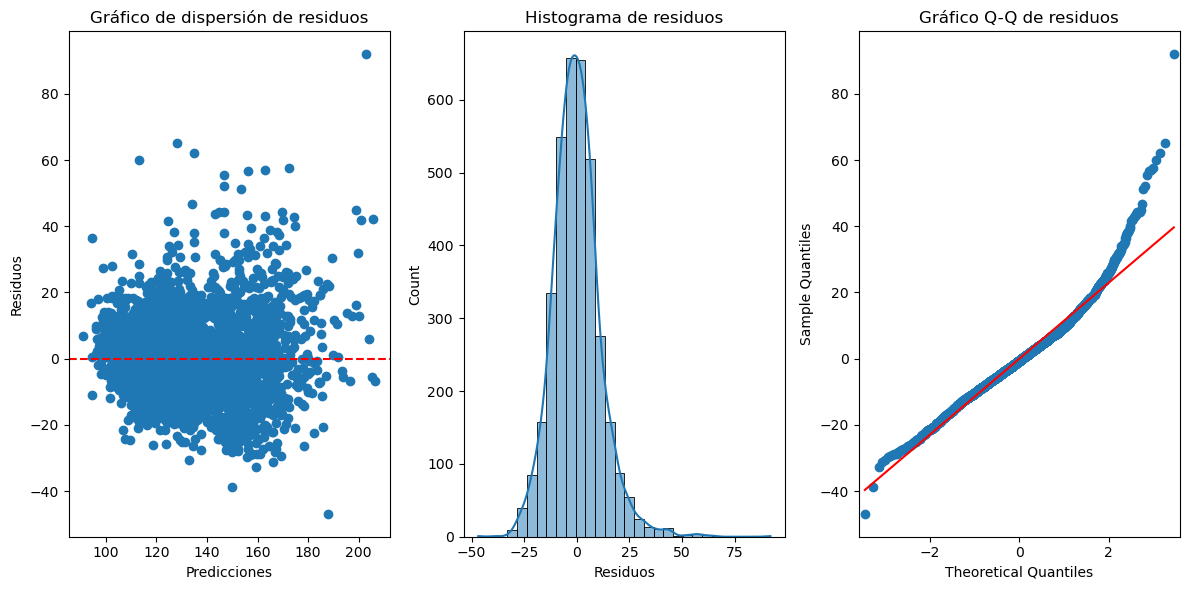

In [26]:
# Grafica de residuales

# Supongamos que ya tienes tus modelos ajustados: model1 y model2
# Coeficientes de determinaci√≥n
r_squared_model1 = model1.rsquared
r_squared_model2 = model2.rsquared

print(f"R¬≤ del modelo de selecci√≥n hacia atr√°s: {r_squared_model1:.4f}")
print(f"R¬≤ del modelo de selecci√≥n hacia adelante: {r_squared_model2:.4f}")

# Seleccionar el mejor modelo
best_model = model1 if r_squared_model1 > r_squared_model2 else model2
print(f"El mejor modelo es: {'Modelo de Selecci√≥n Hacia Atr√°s' if best_model == model1 else 'Modelo de Selecci√≥n Hacia Adelante'}")

# Obtener los residuos y las predicciones
residuals = best_model.resid
predictions = best_model.fittedvalues

# Gr√°fico de dispersi√≥n de residuos: Para verificar la homocedasticidad.
# Histograma de residuos: Para evaluar la normalidad de los residuos.
# Gr√°fico Q-Q: Para verificar la normalidad de los residuos.

# Gr√°fico de dispersi√≥n de residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gr√°fico de dispersi√≥n de residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

# Histograma de residuos
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histograma de residuos')
plt.xlabel('Residuos')

# Gr√°fico Q-Q
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Gr√°fico Q-Q de residuos')

plt.tight_layout()
plt.show()



### ‚≠ïÔ∏è **Diagn√≥stico gr√°fico a los residuos del modelo seleccionado**

* **Gr√°fico de dispersi√≥n de residuos:** Idealmente, los residuos estan distribuidos aleatoriamente alrededor de cero con algunos comportamientos atipicos, lo que indica que son nulos o hay pocos patrones en los errores.

* **Histograma de residuos:** Tiene una forma similar a la campana, lo que indica que los residuos se distribuyen normalmente.

* **Gr√°fico Q-Q:** Los puntos siguen la l√≠nea recta en su mayoria, lo que indica que los residuos siguen una distribuci√≥n normal.

### ‚≠ïÔ∏è **Conclusi√≥n**

En resumen, el modelo de selecci√≥n hacia atr√°s no solo ofrece un buen ajuste a los datos, como lo indica su coeficiente de determinaci√≥n, sino que tambi√©n cumple con las suposiciones necesarias para ser considerado significativo. Esto permite concluir que el modelo es robusto y puede ser utilizado de manera efectiva para realizar predicciones sobre la presi√≥n arterial sist√≥lica en la poblaci√≥n analizada.

## **‚öõÔ∏è 8.0 Verificaci√≥n de supuestos**  
---

- Realizar un test que permita probar la hip√≥tesis nula de que los residuales siguen una distribuci√≥n normal.

### ‚≠ïÔ∏è **Metodolog√≠a del test para probar Hipotesis Nula**

1.   Calcular los residuos del modelo.
2.   Aplicar el test de Shapiro-Wilk.
3.   Interpretar los resultados.

### ‚≠ïÔ∏è **Conclusi√≥n**

Dado que el valor ùëù es mucho menor que cualquier umbral com√∫n de significanci ( ùõº = 0.05 ), podemos concluir que hay suficiente evidencia para rechazar la hip√≥tesis nula.

Estad√≠stico de Shapiro-Wilk: 0.9645240464893213
Valor p: 4.3719045790499935e-29
Se rechaza la hip√≥tesis nula: los residuos no siguen una distribuci√≥n normal.


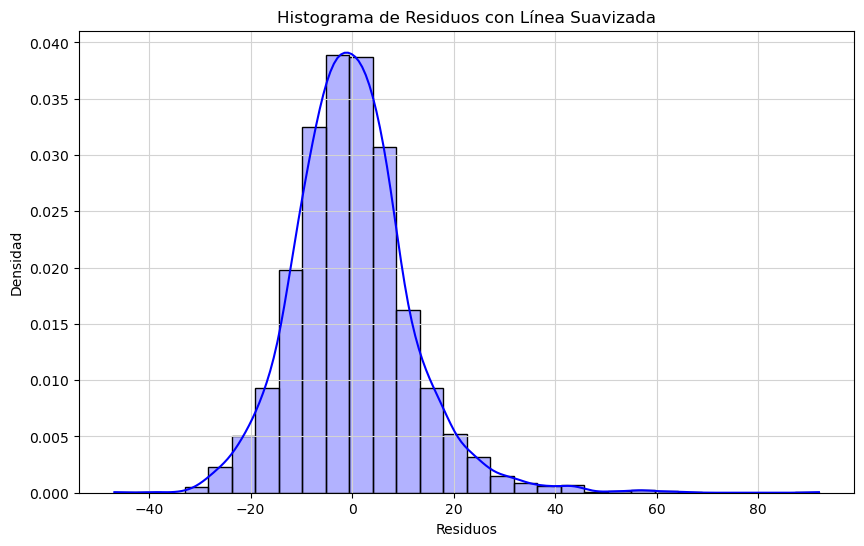

In [27]:
# Test de normaliad usando todas las variables predictoras.
X = df[predictors]  # variables predictoras
X = sm.add_constant(X)  # A√±adir constante para el intercepto
y = df['sysBP']  # Variable dependiente
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Realizar el test de Shapiro-Wilk
shapiro_stat, p_value = stats.shapiro(residuals)

# Mostrar los resultados
print('Estad√≠stico de Shapiro-Wilk:', shapiro_stat)
print('Valor p:', p_value)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('No se rechaza la hip√≥tesis nula: los residuos siguen una distribuci√≥n normal.')
else:
    print('Se rechaza la hip√≥tesis nula: los residuos no siguen una distribuci√≥n normal.')

# Visualizar los residuos con histograma y l√≠nea suavizada
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', edgecolor='black', stat='density', alpha=0.3)
plt.title('Histograma de Residuos con L√≠nea Suavizada')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.grid(color='lightgray')  # Cuadr√≠culas en gris claro
plt.show()

Se llev√≥ a cabo el test de Shapiro-Wilk para evaluar la hip√≥tesis nula de que los residuos del modelo siguen una distribuci√≥n normal. Los resultados fueron los siguientes:

* **Estad√≠stico de Shapiro-Wilk:** 0.9645240464893217
* **Valor p:** 4.371904579051402e-29

Dado que el valor p es significativamente menor que el nivel de significancia com√∫n (0.05), se rechaza la hip√≥tesis nula (H‚ÇÄ) de que los residuos siguen una distribuci√≥n normal. Esto sugiere que los residuos presentan una distribuci√≥n no normal, lo cual es un indicativo de que el modelo podr√≠a no estar ajust√°ndose adecuadamente a los datos o que podr√≠an existir patrones no capturados en los residuos.

El estad√≠stico de Shapiro-Wilk tambi√©n proporciona una medida de la normalidad, donde un valor m√°s cercano a 1 indica normalidad. En este caso, el valor de 0.9629 sugiere cierta desviaci√≥n de la normalidad.

Concluir sobre la verificaci√≥n del supuesto de normalidad en los residuales.


**¬°Felicitaciones! ¬°Muy buen trabajo!**

Entrega
Para entregar el notebook por favor haga lo siguiente:

1. Descargue el notebook (Archivo -> Descargar .ipynb).
2. Importelo como archivo HTML.
3. Realice el env√≠o del archivo en la tarea dispuesta en el aula virtual.
4. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.